In [18]:
# https://github.com/WonJunPark/Stock_price_prediction/blob/master/Stock_price_prediction.ipynb

# get data / library  + check

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation

In [177]:
df = pd.read_csv('dataset/stock_prices.csv')
df.head()

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2021년 12월 30일,"78,300","78,900","79,500","78,100",13.92M,-0.63%
1,2021년 12월 29일,"78,800","80,100","80,100","78,500",21.44K,-1.87%
2,2021년 12월 28일,"80,300","80,200","80,400","79,700",16.31K,0.12%
3,2021년 12월 27일,"80,200","80,600","80,600","79,900",0.58K,-0.37%
4,2021년 12월 26일,"80,500","80,500","80,500","80,500",-,0.00%


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2874 entries, 0 to 2873
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      2874 non-null   object
 1   종가      2874 non-null   object
 2   오픈      2874 non-null   object
 3   고가      2874 non-null   object
 4   저가      2874 non-null   object
 5   거래량     2874 non-null   object
 6   변동 %    2874 non-null   object
dtypes: object(7)
memory usage: 157.3+ KB


In [179]:
df

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2021년 12월 30일,"78,300","78,900","79,500","78,100",13.92M,-0.63%
1,2021년 12월 29일,"78,800","80,100","80,100","78,500",21.44K,-1.87%
2,2021년 12월 28일,"80,300","80,200","80,400","79,700",16.31K,0.12%
3,2021년 12월 27일,"80,200","80,600","80,600","79,900",0.58K,-0.37%
4,2021년 12월 26일,"80,500","80,500","80,500","80,500",-,0.00%
...,...,...,...,...,...,...,...
2869,2011년 08월 29일,"733,000","742,000","742,000","724,000",256.14K,0.96%
2870,2011년 08월 26일,"726,000","717,000","734,000","717,000",201.95K,0.14%
2871,2011년 08월 25일,"725,000","737,000","738,000","721,000",376.19K,2.40%
2872,2011년 08월 24일,"708,000","724,000","735,000","700,000",370.17K,-2.07%


# data preprocessing

In [180]:
# 날짜변경 -정규표현식
# 숫자제외 모든것''처리
df["날짜"] = df["날짜"].str.replace(pat=r'[^\d]', repl=r'', regex=True)
df

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,20211230,"78,300","78,900","79,500","78,100",13.92M,-0.63%
1,20211229,"78,800","80,100","80,100","78,500",21.44K,-1.87%
2,20211228,"80,300","80,200","80,400","79,700",16.31K,0.12%
3,20211227,"80,200","80,600","80,600","79,900",0.58K,-0.37%
4,20211226,"80,500","80,500","80,500","80,500",-,0.00%
...,...,...,...,...,...,...,...
2869,20110829,"733,000","742,000","742,000","724,000",256.14K,0.96%
2870,20110826,"726,000","717,000","734,000","717,000",201.95K,0.14%
2871,20110825,"725,000","737,000","738,000","721,000",376.19K,2.40%
2872,20110824,"708,000","724,000","735,000","700,000",370.17K,-2.07%


In [181]:
# 날짜 datetime으로 변경
df["날짜"]=pd.to_datetime(df["날짜"])
df

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2021-12-30,"78,300","78,900","79,500","78,100",13.92M,-0.63%
1,2021-12-29,"78,800","80,100","80,100","78,500",21.44K,-1.87%
2,2021-12-28,"80,300","80,200","80,400","79,700",16.31K,0.12%
3,2021-12-27,"80,200","80,600","80,600","79,900",0.58K,-0.37%
4,2021-12-26,"80,500","80,500","80,500","80,500",-,0.00%
...,...,...,...,...,...,...,...
2869,2011-08-29,"733,000","742,000","742,000","724,000",256.14K,0.96%
2870,2011-08-26,"726,000","717,000","734,000","717,000",201.95K,0.14%
2871,2011-08-25,"725,000","737,000","738,000","721,000",376.19K,2.40%
2872,2011-08-24,"708,000","724,000","735,000","700,000",370.17K,-2.07%


In [182]:
# 숫자에 쉼표 제거
df["종가"] = df["종가"].str.replace(pat=r'[^\d]', repl=r'', regex=True)
df["오픈"] = df["오픈"].str.replace(pat=r'[^\d]', repl=r'', regex=True)
df["저가"] = df["저가"].str.replace(pat=r'[^\d]', repl=r'', regex=True)
df["고가"] = df["고가"].str.replace(pat=r'[^\d]', repl=r'', regex=True)
df

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2021-12-30,78300,78900,79500,78100,13.92M,-0.63%
1,2021-12-29,78800,80100,80100,78500,21.44K,-1.87%
2,2021-12-28,80300,80200,80400,79700,16.31K,0.12%
3,2021-12-27,80200,80600,80600,79900,0.58K,-0.37%
4,2021-12-26,80500,80500,80500,80500,-,0.00%
...,...,...,...,...,...,...,...
2869,2011-08-29,733000,742000,742000,724000,256.14K,0.96%
2870,2011-08-26,726000,717000,734000,717000,201.95K,0.14%
2871,2011-08-25,725000,737000,738000,721000,376.19K,2.40%
2872,2011-08-24,708000,724000,735000,700000,370.17K,-2.07%


In [183]:
# 거래량 K/M 대신 숫자로 변경

import warnings
warnings.filterwarnings(action='ignore') 


df_M= df[df['거래량'].str.contains('M')]
df_K= df[df['거래량'].str.contains('K')]

for i in range(len(df_M)):
    a= df_M['거래량'].iloc[i]
    a= a.replace('M','')
    df_M['거래량'].iloc[i]=a

for i in range(len(df_K)):
    a= df_K['거래량'].iloc[i]
    a= a.replace('K','')
    df_K['거래량'].iloc[i]=a

df_M['거래량']= df_M['거래량'].astype('float')*1000000
df_K['거래량']= df_K['거래량'].astype('float')*1000


In [184]:
df_M.head(1)

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2021-12-30,78300,78900,79500,78100,13920000.0,-0.63%


In [185]:
df_K.head(1)

,날짜,종가,오픈,고가,저가,거래량,변동 %
1,2021-12-29,78800,80100,80100,78500,21440.0,-1.87%


In [186]:
df= pd.concat([df_M,df_K],axis=0)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2618 entries, 0 to 2873
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      2618 non-null   datetime64[ns]
 1   종가      2618 non-null   object        
 2   오픈      2618 non-null   object        
 3   고가      2618 non-null   object        
 4   저가      2618 non-null   object        
 5   거래량     2618 non-null   float64       
 6   변동 %    2618 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 163.6+ KB


In [188]:
# dtype 변경

def convert_type(col):
    df[col]= df[col].astype('float')
    return df[col]

cols= ['종가','오픈','고가','저가']
for col in cols:
    convert_type(col)

    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2618 entries, 0 to 2873
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      2618 non-null   datetime64[ns]
 1   종가      2618 non-null   float64       
 2   오픈      2618 non-null   float64       
 3   고가      2618 non-null   float64       
 4   저가      2618 non-null   float64       
 5   거래량     2618 non-null   float64       
 6   변동 %    2618 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 163.6+ KB


In [189]:
df.columns = ['date', 'colse', 'open', 'high', 'low', 'volume', '%']

In [190]:
# mid price

high = df['high'].values
low = df['low'].values
mid_price = (high + low) / 2

df['mid']= mid_price

In [191]:
df = df.set_index('date')

In [192]:
df.head()

,colse,open,high,low,volume,%,mid
date,,,,,,,
2021-12-30,78300.0,78900.0,79500.0,78100.0,13920000.0,-0.63%,78800.0
2021-12-24,80500.0,80200.0,80800.0,80200.0,12020000.0,0.75%,80500.0
2021-12-17,78000.0,76800.0,78000.0,76800.0,11800000.0,0.26%,77400.0
2021-12-10,76900.0,77400.0,77600.0,76800.0,9090000.0,-1.66%,77200.0
2021-12-03,75600.0,75600.0,76000.0,74100.0,17620000.0,-0.26%,75050.0


## 그래프

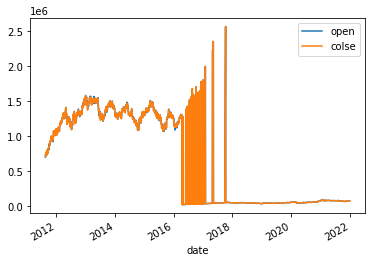

In [205]:
df[['open','colse']].plot()
plt.show()

In [198]:
df_2021 = df[df.index>'2020-01-01']

In [196]:
df.index()

TypeError: 'DatetimeIndex' object is not callable

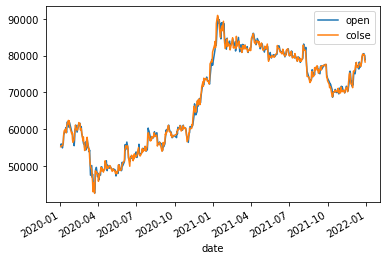

In [200]:
df_2021[['open','colse']].plot()
plt.show()

In [199]:
df_2021

,colse,open,high,low,volume,%,mid
date,,,,,,,
2021-12-30,78300.0,78900.0,79500.0,78100.0,13920000.0,-0.63%,78800.0
2021-12-24,80500.0,80200.0,80800.0,80200.0,12020000.0,0.75%,80500.0
2021-12-17,78000.0,76800.0,78000.0,76800.0,11800000.0,0.26%,77400.0
2021-12-10,76900.0,77400.0,77600.0,76800.0,9090000.0,-1.66%,77200.0
2021-12-03,75600.0,75600.0,76000.0,74100.0,17620000.0,-0.26%,75050.0
...,...,...,...,...,...,...,...
2020-03-26,47800.0,48950.0,49300.0,47750.0,3390.0,-1.75%,48525.0
2020-03-25,48650.0,48950.0,49600.0,47150.0,45010.0,3.62%,48375.0
2020-03-24,46950.0,43800.0,46950.0,43100.0,890.0,10.47%,45025.0


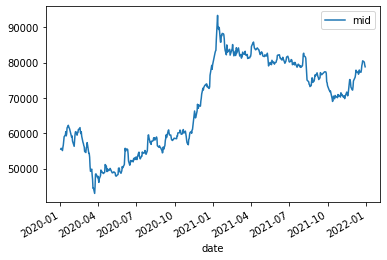

In [201]:
df_2021[['mid']].plot()
plt.show()

In [ ]:
# 주가 이동평균선
# https://wikidocs.net/4375


In [227]:
df_2015 = df[df.index>'2015-01-01']
mid_p= np.array(df_2015['mid'])

In [230]:
# 50일 이전
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_p) - sequence_length):
    result.append(mid_p[index: index + sequence_length])

In [232]:
print(len(mid_p)-51)
print(len(result))


1736
1736


In [233]:
# z-score 
normalized_data = []
window_mean = []
window_std = []

for window in result:
    normalized_window = [((p - np.mean(window)) / np.std(window)) for p in window]
    normalized_data.append(normalized_window)
    window_mean.append(np.mean(window))
    window_std.append(np.std(window))

result = np.array(normalized_data)

# 50일 이전까지중에 0.9는 train 나머지 val
# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
# 50(xtst) 1(yt)

np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1562, 50, 1), (174, 50, 1))

# model

In [235]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50, 50)            10400     
                                                                 
 lstm_5 (LSTM)               (None, 32)                10624     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21,057
Trainable params: 21,057
Non-trainable params: 0
_________________________________________________________________


In [236]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=5,
    epochs=10)

Epoch 1/10
313/313 [==============================] - 11s 29ms/step - loss: 0.5412 - val_loss: 0.1963
Epoch 2/10
313/313 [==============================] - 9s 27ms/step - loss: 0.2685 - val_loss: 0.1141
Epoch 3/10
313/313 [==============================] - 8s 27ms/step - loss: 0.2387 - val_loss: 0.1010
Epoch 4/10
313/313 [==============================] - 8s 27ms/step - loss: 0.2356 - val_loss: 0.1215
Epoch 5/10
313/313 [==============================] - 8s 26ms/step - loss: 0.2319 - val_loss: 0.1069
Epoch 6/10
313/313 [==============================] - 8s 26ms/step - loss: 0.2300 - val_loss: 0.1074
Epoch 7/10
313/313 [==============================] - 8s 26ms/step - loss: 0.2309 - val_loss: 0.1364
Epoch 8/10
313/313 [==============================] - 8s 25ms/step - loss: 0.2293 - val_loss: 0.1019
Epoch 9/10
313/313 [==============================] - 8s 25ms/step - loss: 0.2260 - val_loss: 0.1859
Epoch 10/10
313/313 [==============================] - 8s 25ms/step - loss: 0.2323 - val_l

# 예측

In [237]:
pred = model.predict(x_test)

In [239]:
pred_result = []
pred_y = []
for i in range(len(pred)):
    n1 = (pred[i] * window_std[i]) + window_mean[i]
    n2 = (y_test[i] * window_std[i]) + window_mean[i]
    pred_result.append(n1)
    pred_y.append(n2)
    

In [247]:
df_50= df_2015.iloc[:-51]

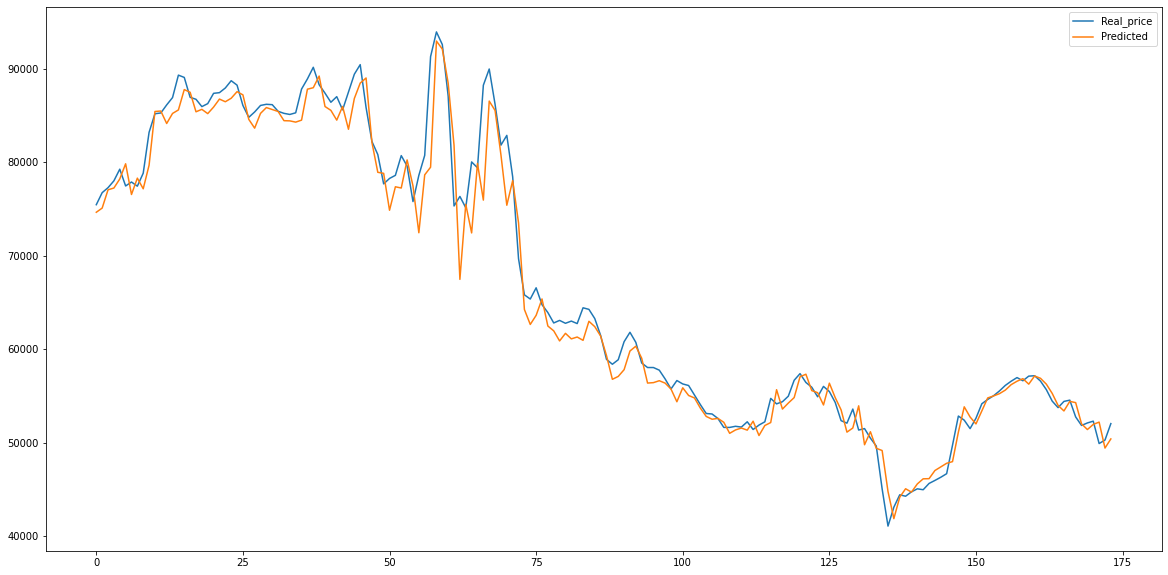

In [240]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(pred_y, label='Real_price')
ax.plot(pred_result, label='Predicted')
ax.legend()
plt.show()

In [269]:
print(df[df.index=='2020-04-02'].mid)
print(df[df.index=='2020-04-03'].mid)
print(df[df.index=='2020-04-06'].mid)

date
2020-04-02    46100.0
Name: mid, dtype: float64
date
2020-04-03    47075.0
Name: mid, dtype: float64
date
2020-04-06    48025.0
Name: mid, dtype: float64
